In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

<h1> Read Data </h1>

In [5]:
df = pd.read_csv("esg_dataset.csv")

In [6]:
df.head()

,company_id,company_name,year,industry,region,revenue,net_profit,total_assets,total_liabilities,equity,...,audit_opinion,fraud_risk_score,g_index,esg_score,stock_volatility,market_cap,ownership_type,risk_category,audit_firm,financial_health_index
0,SH969694,Haier Precision Ltd.,2022,Manufacturing,Sichuan,10842.32,1941.90,16828.60,6075.45,10753.15,...,Qualified,0.37,1,61,0.18,32356.57,Private,Low,Big4,0.15
1,SH319685,Guangzhou Pharma Group,2022,Pharmaceuticals,Hebei,10645.28,522.59,15085.21,10776.40,4308.81,...,Standard,0.18,2,61,0.33,28095.09,Private,Low,Local Tier 1,0.08
2,SZ694732,Sinopec Green Energy,2022,Energy,Sichuan,8993.79,2226.45,13173.37,4370.65,8802.72,...,Standard,0.74,8,63,0.36,21973.57,Private,High,Local Tier 2,0.21
3,SZ358608,Guangzhou Pharma Group,2022,Pharmaceuticals,Hebei,5305.38,1238.70,8370.68,3011.75,5358.93,...,Standard,0.56,10,42,0.57,11651.27,SOE,Medium,Local Tier 1,0.19
4,SZ245052,CRRC Urban Transit,2021,Transportation,Jiangsu,9084.19,2759.81,16503.92,9025.96,7477.96,...,Standard,0.42,2,57,0.25,28162.58,Private,Medium,Local Tier 1,0.27


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37325 entries, 0 to 37324
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_id              37325 non-null  object 
 1   company_name            37325 non-null  object 
 2   year                    37325 non-null  int64  
 3   industry                37325 non-null  object 
 4   region                  37325 non-null  object 
 5   revenue                 37325 non-null  float64
 6   net_profit              37325 non-null  float64
 7   total_assets            37325 non-null  float64
 8   total_liabilities       37325 non-null  float64
 9   equity                  37325 non-null  float64
 10  operating_cash_flow     37325 non-null  float64
 11  roe                     37325 non-null  float64
 12  roa                     37325 non-null  float64
 13  debt_to_equity_ratio    37325 non-null  float64
 14  profit_margin           37325 non-null

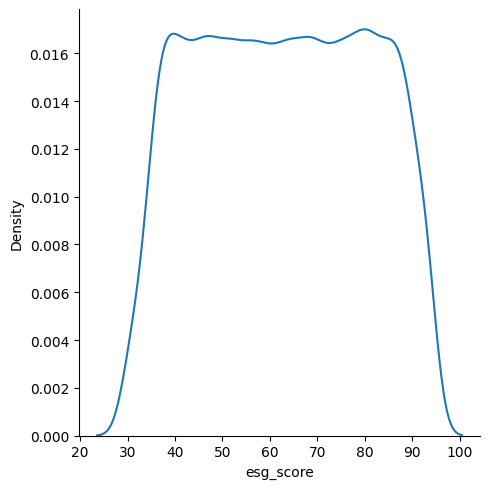

In [8]:
sns.displot(df, x="esg_score", kind="kde")

<h1> 1. Clean Data </h1>

In [9]:
categorical_cols = ['industry', 'region', 'credit_rating', 'ownership_type','risk_category']

for col in categorical_cols:
    if col in df.columns:
        df[f'{col}_code'] = df[col].astype('category').cat.codes

In [10]:
ln_vars = ['total_assets','revenue','net_profit','total_liabilities','equity','operating_cash_flow','roe','roa','market_cap']

In [11]:
for var in ln_vars:
    if var in df.columns:
        df[f'ln_{var}'] = np.log(df[var].clip(lower=1e-9))

In [12]:
years = sorted(df['year'].dropna().unique())
print("year：", years)

year： [np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]


In [13]:
df.head()

,company_id,company_name,year,industry,region,revenue,net_profit,total_assets,total_liabilities,equity,...,risk_category_code,ln_total_assets,ln_revenue,ln_net_profit,ln_total_liabilities,ln_equity,ln_operating_cash_flow,ln_roe,ln_roa,ln_market_cap
0,SH969694,Haier Precision Ltd.,2022,Manufacturing,Sichuan,10842.32,1941.90,16828.60,6075.45,10753.15,...,1,9.730835,9.291212,7.571422,8.712011,9.282954,7.569489,2.893700,2.445819,10.384572
1,SH319685,Guangzhou Pharma Group,2022,Pharmaceuticals,Hebei,10645.28,522.59,15085.21,10776.40,4308.81,...,1,9.621470,9.272872,6.258797,9.285114,8.368417,6.199799,2.495682,1.241269,10.243350
2,SZ694732,Sinopec Green Energy,2022,Energy,Sichuan,8993.79,2226.45,13173.37,4370.65,8802.72,...,0,9.485953,9.104290,7.708164,8.382667,9.082816,7.629543,3.230409,2.827314,9.997596
3,SZ358608,Guangzhou Pharma Group,2022,Pharmaceuticals,Hebei,5305.38,1238.70,8370.68,3011.75,5358.93,...,2,9.032490,8.576477,7.121818,8.010277,8.586520,7.203673,3.140265,2.694627,9.363170
4,SZ245052,CRRC Urban Transit,2021,Transportation,Jiangsu,9084.19,2759.81,16503.92,9025.96,7477.96,...,2,9.711353,9.114291,7.922917,9.107860,8.919715,7.931971,3.608483,2.816606,10.245749


In [14]:
df.drop(columns=ln_vars, inplace=True)

In [15]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols]

<h1> 2. Descriptive from all data </h1>

In [16]:
print("CATEGORICAL VARIABLE IMPACT")

categorical_cols = ['industry', 'region', 'credit_rating', 'audit_opinion', 
                   'ownership_type', 'risk_category', 'audit_firm']

# Remove columns that don't exist in the dataset
categorical_cols = [col for col in categorical_cols if col in df.columns]

for col in categorical_cols:
    # if df[col].nunique() < 20:  # Only analyze if not too many categories
    # avg_esg = df.groupby(col)['esg_score'].agg(['median', 'count']).sort_values('median', ascending=False)
    stats = df.groupby(col)['esg_score'].agg([
        'count',
        ('Q1', lambda x: x.quantile(0.25)),
        'median',
        ('Q3', lambda x: x.quantile(0.75))
    ]).round(0).astype(int)
    print(f"\nESG Score by {col}:")
    print(stats.head(10))

print("\n" + "="*50 + "\n")

CATEGORICAL VARIABLE IMPACT

ESG Score by industry:
                     count  Q1  median  Q3
industry                                  
Agriculture           4177  47      63  77
Energy                4170  48      63  78
Financial Services    4110  48      62  78
Manufacturing         4141  48      63  77
Pharmaceuticals       4131  48      63  78
Real Estate           4087  48      63  78
Retail & E-commerce   4241  48      63  78
Technology            4154  47      63  78
Transportation        4114  48      64  78

ESG Score by region:
           count  Q1  median  Q3
region                          
Beijing     4838  48      63  78
Guangdong   4590  48      63  78
Hebei       4644  47      63  78
Jiangsu     4601  48      62  79
Shanghai    4636  48      63  77
Shenzhen    4590  48      63  78
Sichuan     4709  48      63  78
Zhejiang    4717  48      63  78

ESG Score by credit_rating:
               count  Q1  median  Q3
credit_rating                       
A               8820

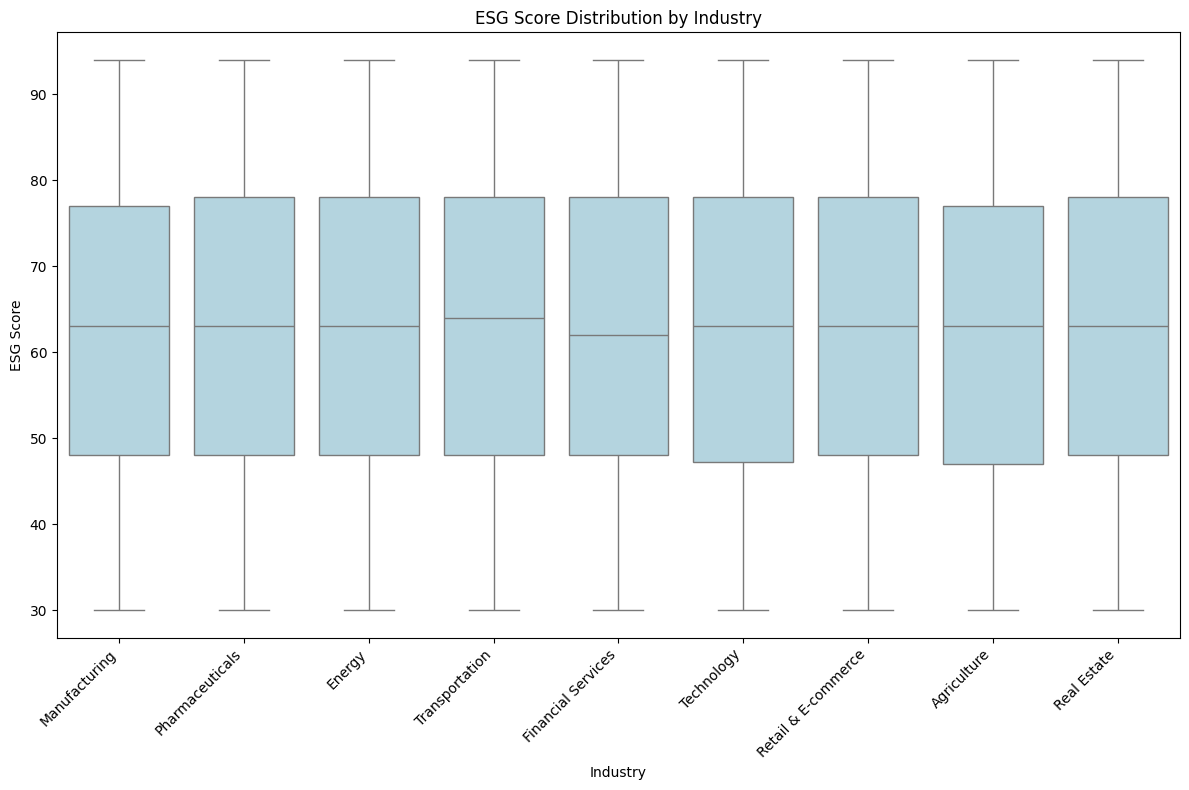

In [17]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df, x='industry', y='esg_score', color='lightblue')
plt.title('ESG Score Distribution by Industry')
plt.xlabel('Industry')
plt.ylabel('ESG Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

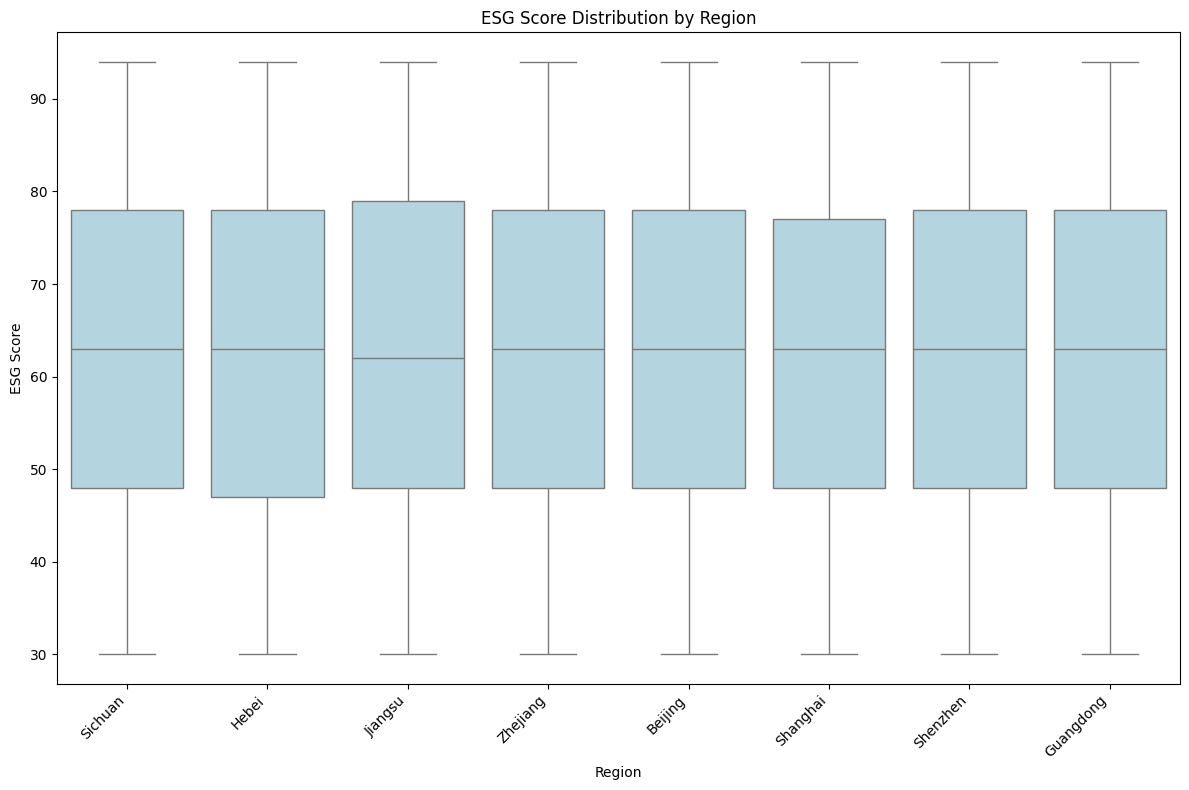

In [18]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df, x='region', y='esg_score', color='lightblue')
plt.title('ESG Score Distribution by Region')
plt.xlabel('Region')
plt.ylabel('ESG Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top factors correlated with ESG score:
year                   :  0.1143
ln_net_profit          :  0.0351
ln_operating_cash_flow :  0.0347
ln_roa                 :  0.0336
ln_roe                 :  0.0326
profit_margin          :  0.0318
anomaly_label          : -0.0306
ln_equity              :  0.0226
ln_total_assets        :  0.0198
ln_market_cap          :  0.0184


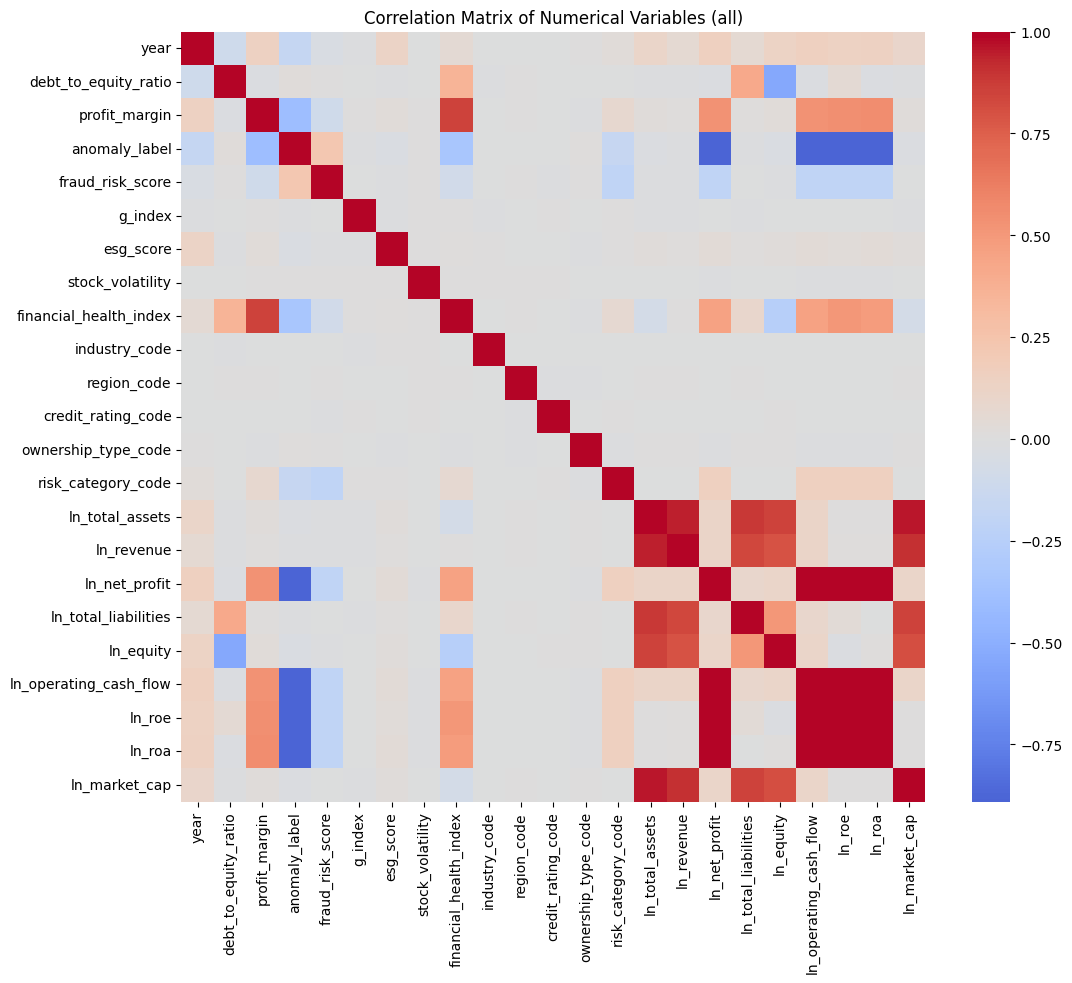

In [19]:
# Calculate correlations with ESG score
correlations = df[numerical_cols].corr()['esg_score'].drop('esg_score').sort_values(key=abs, ascending=False)

print("Top factors correlated with ESG score:")
for factor, corr in correlations.head(10).items():
    print(f"{factor:23}: {corr:>7.4f}")

# Visualization: Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables (all)')
plt.show()

In [21]:
# Detect variables with high multicollinearity
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Initialize lists
variables_to_remove = []
remaining_vars = numerical_cols.copy()

# Iteratively remove high VIF variables
while True:
    # Define the predictor variables
    X = df[remaining_vars]
    # Add a constant to the model (intercept)
    X = add_constant(X)
    # Calculate VIF for each feature
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Find max VIF (excluding constant)
    vif_no_const = vif[vif['Feature'] != 'const']
    max_vif = vif_no_const['VIF'].max()
    
    if max_vif <= 10:
        print("No more variables with VIF > 10")
        break
    
    # Check which variables have VIF > 10
    high_vif_vars = []
    for index, row in vif.iterrows():
        feature = row['Feature']
        vif_value = row['VIF']
        if vif_value > 10 and feature != 'const':
            high_vif_vars.append(feature)
    
    # Remove variable with highest VIF
    var_to_remove = vif_no_const.loc[vif_no_const['VIF'].idxmax(), 'Feature']
    variables_to_remove.append(var_to_remove)
    remaining_vars.remove(var_to_remove)
    print(f"Removing {var_to_remove} (VIF = {max_vif:.2f})")
    
    if len(remaining_vars) <= 1:
        break

print(f"\nFinal variables: {remaining_vars}")
print(f"Removed variables: {variables_to_remove}")

Removing ln_net_profit (VIF = 4103.15)
Removing ln_total_assets (VIF = 3971.01)
Removing ln_roe (VIF = 2260.58)
Removing ln_roa (VIF = 615.92)
Removing ln_equity (VIF = 35.65)
Removing ln_total_liabilities (VIF = 15.85)
No more variables with VIF > 10

Final variables: ['year', 'debt_to_equity_ratio', 'profit_margin', 'anomaly_label', 'fraud_risk_score', 'g_index', 'esg_score', 'stock_volatility', 'financial_health_index', 'industry_code', 'region_code', 'credit_rating_code', 'ownership_type_code', 'risk_category_code', 'ln_revenue', 'ln_operating_cash_flow', 'ln_market_cap']
Removed variables: ['ln_net_profit', 'ln_total_assets', 'ln_roe', 'ln_roa', 'ln_equity', 'ln_total_liabilities']


Top factors correlated with ESG score (after VIF cleaning):
year                     :  0.1143
ln_operating_cash_flow   :  0.0347
profit_margin            :  0.0318
anomaly_label            : -0.0306
ln_market_cap            :  0.0184
financial_health_index   :  0.0162
debt_to_equity_ratio     : -0.0138
ln_revenue               :  0.0122
industry_code            :  0.0085
ownership_type_code      : -0.0080


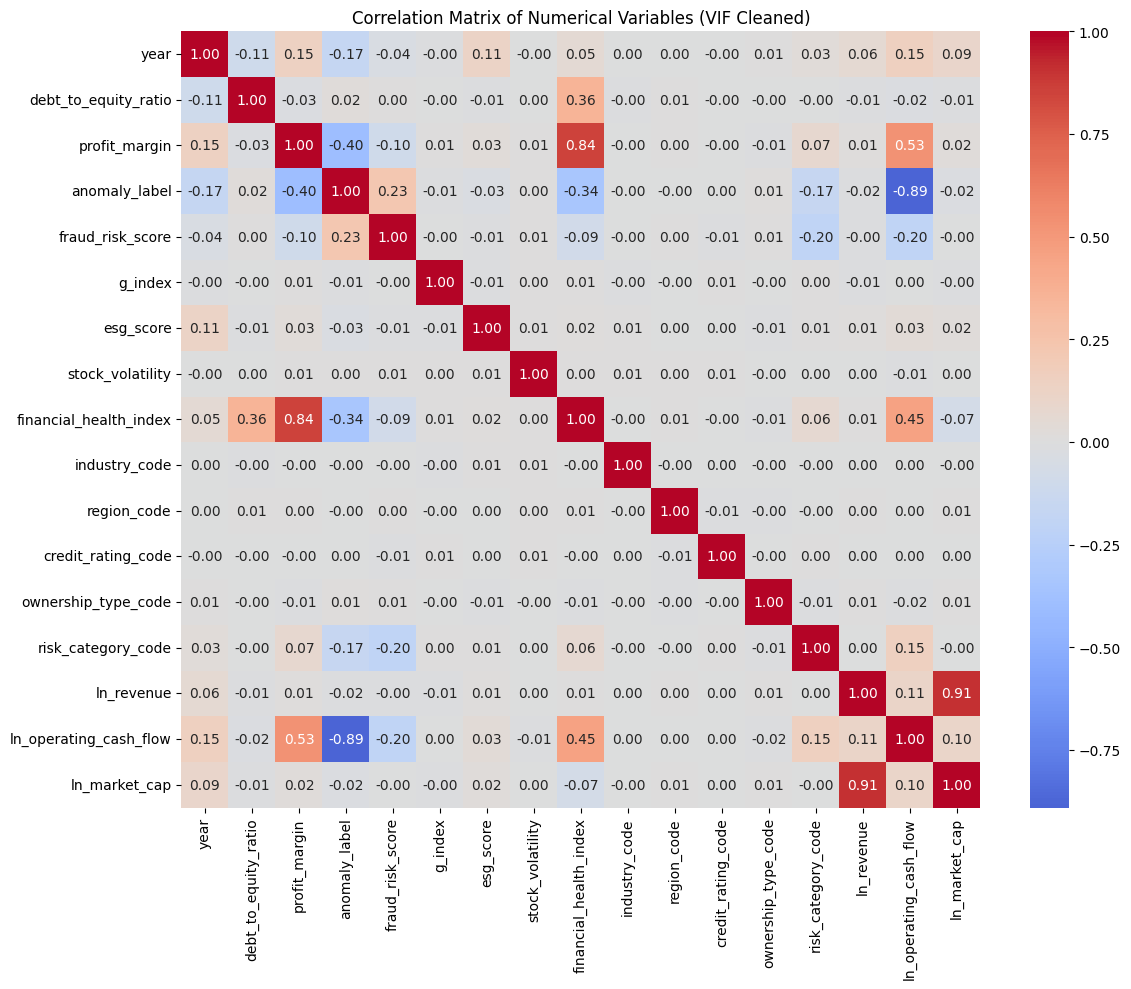

In [22]:
# Calculate correlations with ESG score using cleaned variables
cleaned_cols = remaining_vars  # Add esg_score back for correlation analysis
correlations = df[cleaned_cols].corr()['esg_score'].drop('esg_score')

# Safe sorting approach - works for both Series and DataFrame
if isinstance(correlations, pd.Series):
    # Sort by absolute value but keep original correlation values
    correlations_sorted = correlations.loc[correlations.abs().sort_values(ascending=False).index]
else:
    # If it's a DataFrame (shouldn't happen but just in case)
    correlations_sorted = correlations.iloc[:, 0].loc[correlations.iloc[:, 0].abs().sort_values(ascending=False).index]

print("Top factors correlated with ESG score (after VIF cleaning):")
for factor, corr in correlations_sorted.head(10).items():
    print(f"{factor:<25}: {corr:>7.4f}")

# Visualization: Correlation heatmap with cleaned variables
plt.figure(figsize=(12, 10))
corr_matrix = df[cleaned_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables (VIF Cleaned)')
plt.tight_layout()
plt.show()

<h1> 3. Descriptive from different years </h1>

In [23]:
print("CATEGORICAL VARIABLE IMPACT (By different Years)")


# save only columns that exist in the dataset
categorical_cols = [col for col in categorical_cols if col in df.columns]


for yr in years:
    df_year = df[df['year'] == yr]
    print("\n" + "="*60)
    print(f"📊 Categorical Variable Analysis for Year {yr}")
    print("="*60)
    
    for col in categorical_cols:
        stats = df_year.groupby(col)['esg_score'].agg([
            'count',
            ('Q1', lambda x: x.quantile(0.25)),
            'median',
            ('Q3', lambda x: x.quantile(0.75))
        ]).round(0).astype(int)
        
        print(f"\nESG Score by {col} ({yr}):")
        print(stats.head(10))  # print first 10 rows

CATEGORICAL VARIABLE IMPACT (By different Years)

📊 Categorical Variable Analysis for Year 2021

ESG Score by industry (2021):
                     count  Q1  median  Q3
industry                                  
Agriculture            746  45      60  74
Energy                 696  42      57  75
Financial Services     746  44      60  74
Manufacturing          719  44      59  74
Pharmaceuticals        703  45      61  76
Real Estate            731  46      61  75
Retail & E-commerce    770  45      59  74
Technology             733  44      59  76
Transportation         716  46      60  71

ESG Score by region (2021):
           count  Q1  median  Q3
region                          
Beijing      816  44      59  75
Guangdong    809  45      60  74
Hebei        810  45      61  75
Jiangsu      820  44      58  75
Shanghai     829  44      58  74
Shenzhen     831  45      60  74
Sichuan      843  45      59  74
Zhejiang     802  46      61  75

ESG Score by credit_rating (2021):
     

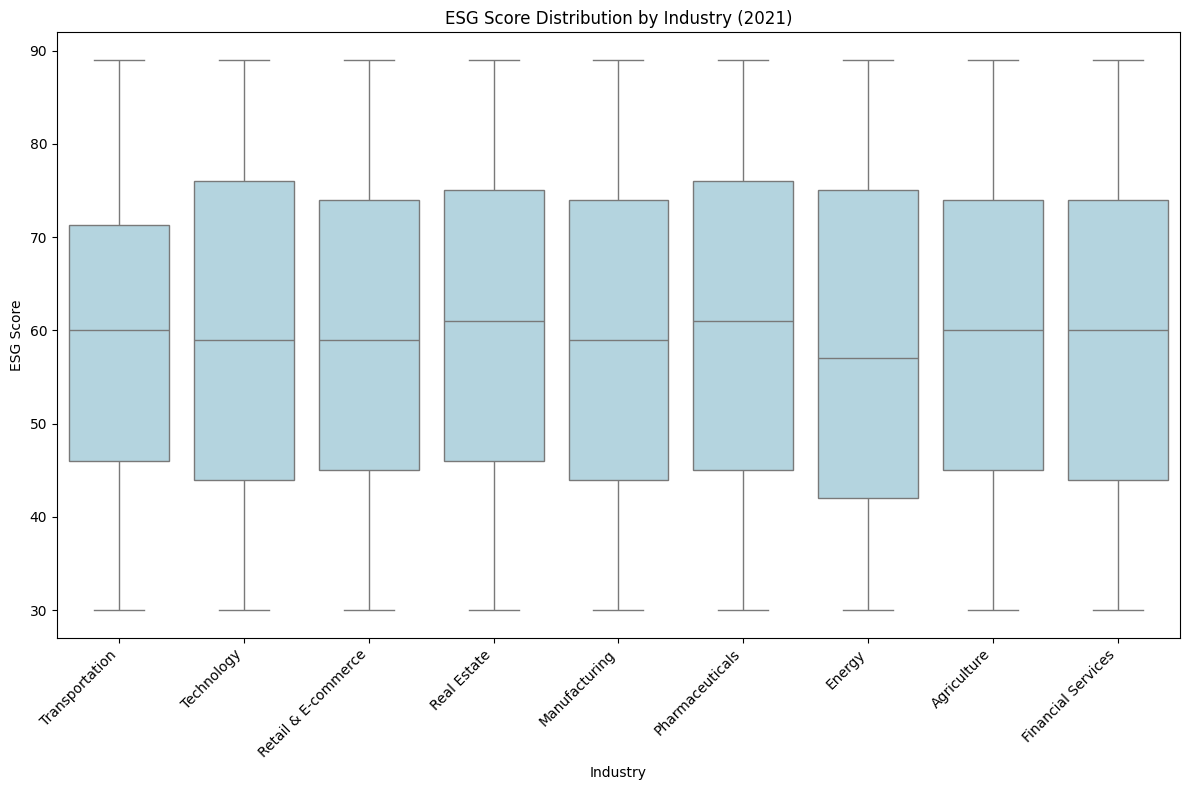

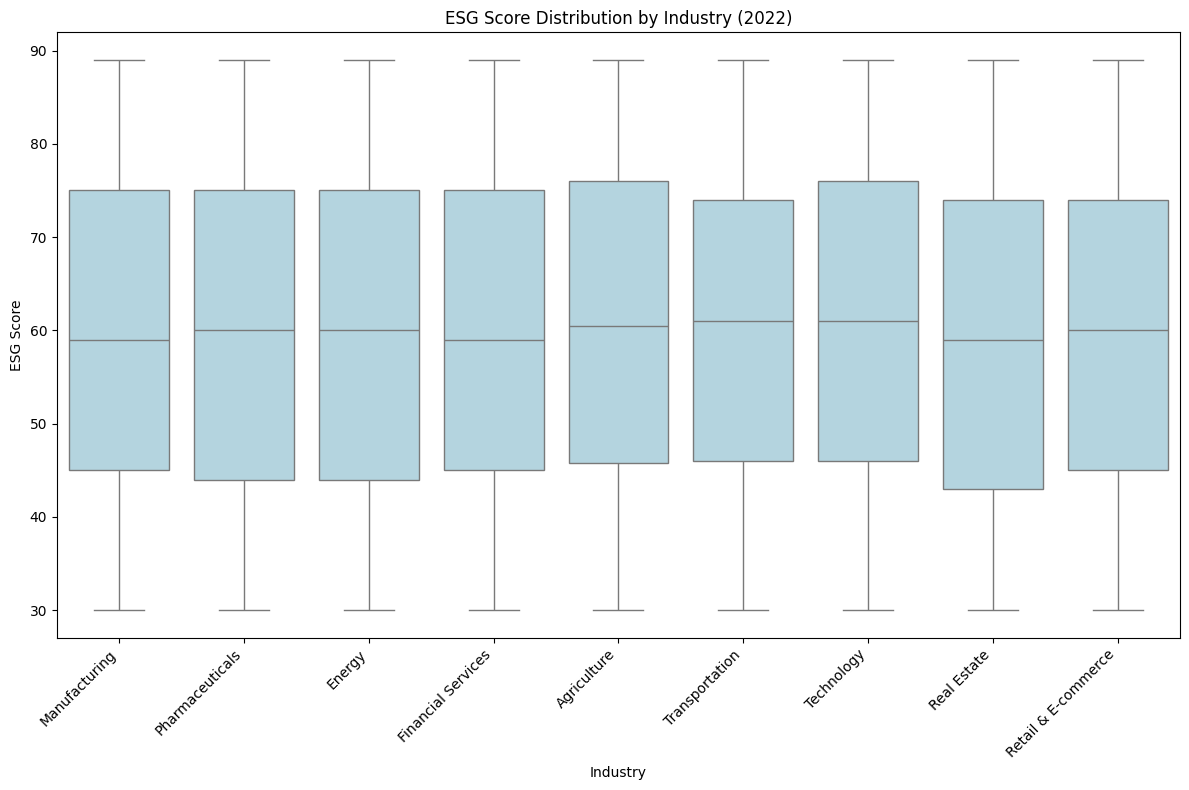

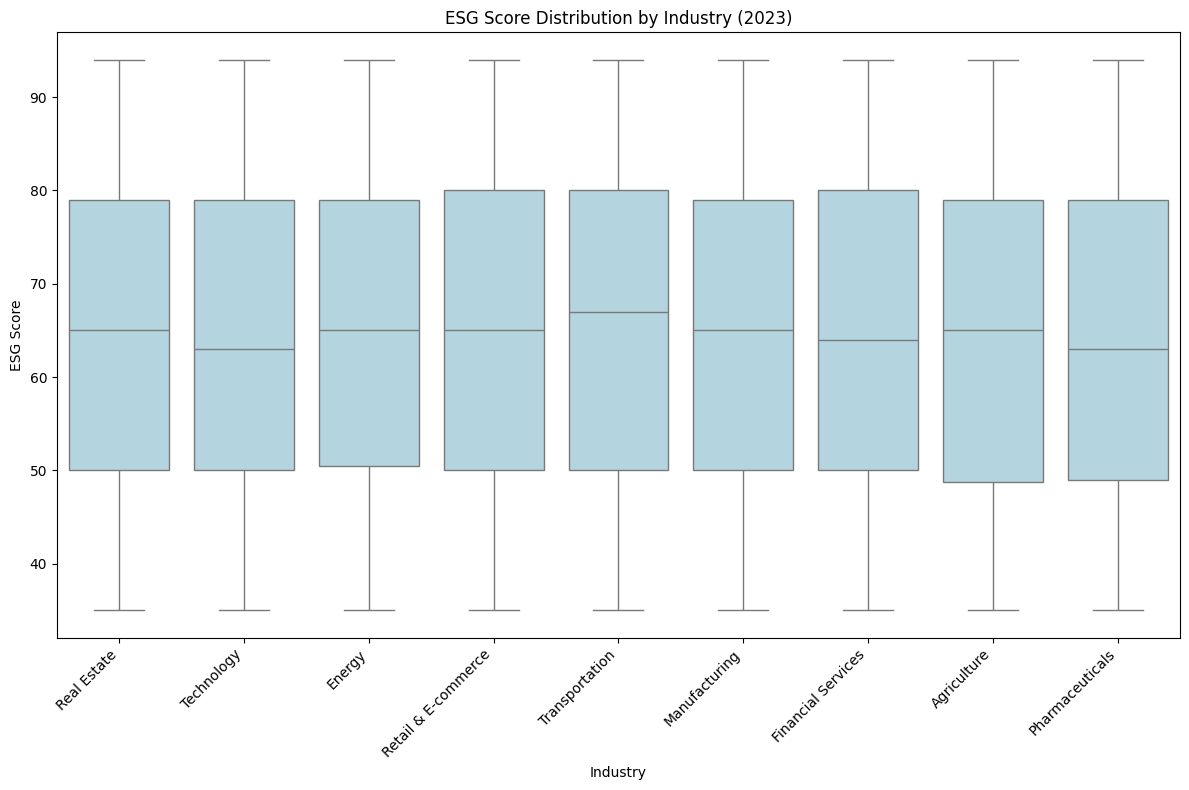

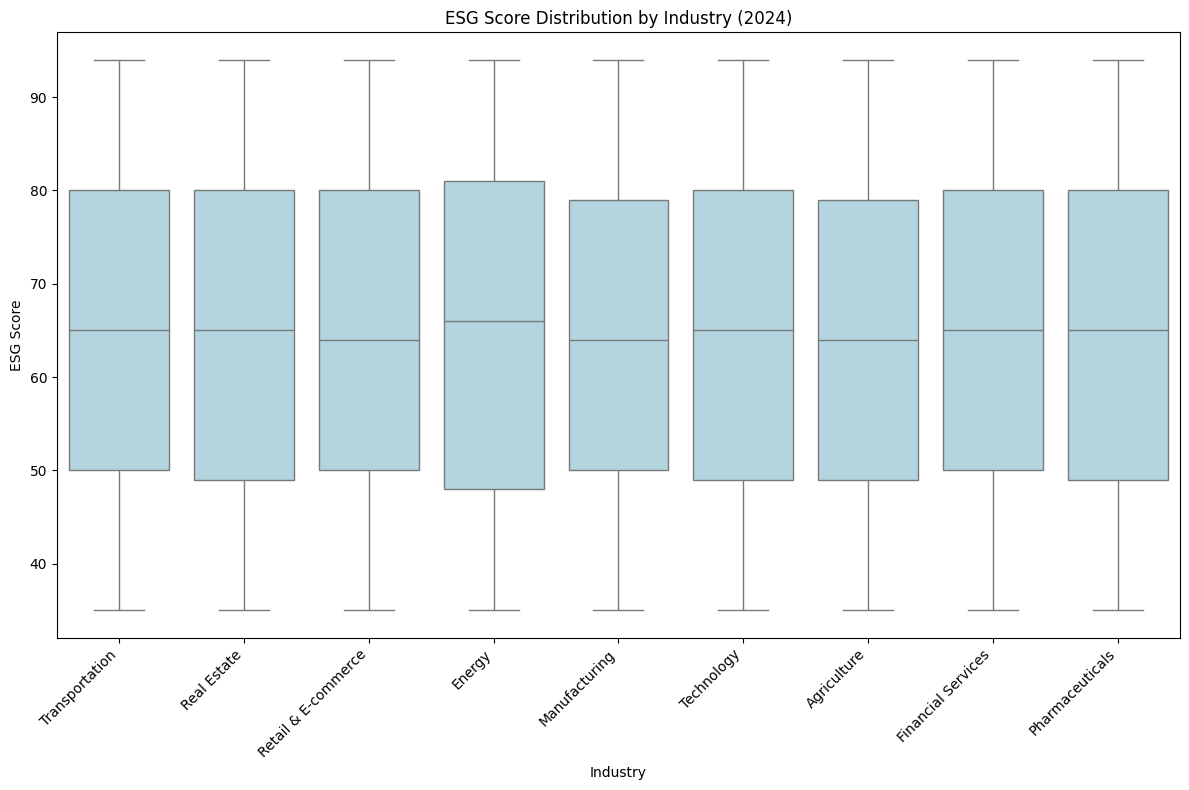

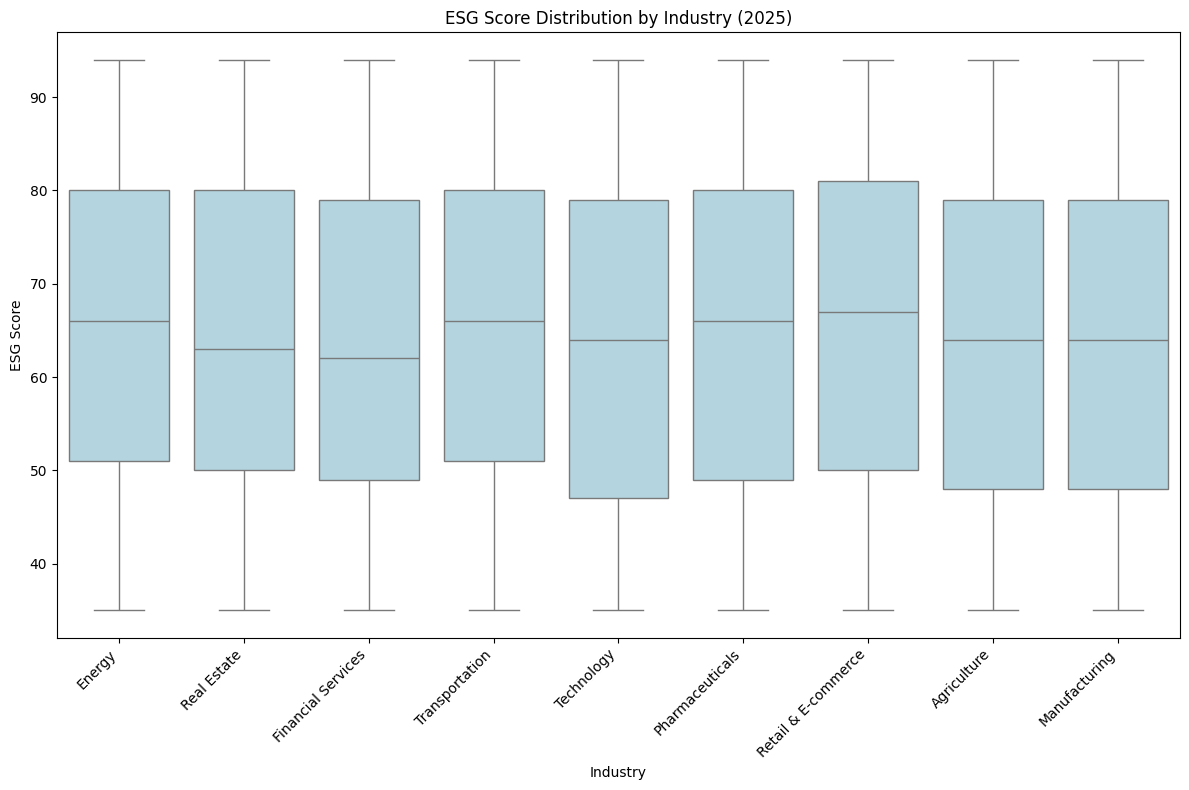

In [24]:
for yr in years:
    df_year = df[df['year'] == yr]
    
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(data=df_year, x='industry', y='esg_score', color='lightblue')
    plt.title(f'ESG Score Distribution by Industry ({yr})')
    plt.xlabel('Industry')
    plt.ylabel('ESG Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



📊 ESG Correlation Analysis for Year 2021
Top factors correlated with ESG score:
stock_volatility       : -0.0198
financial_health_index :  0.0157
ln_roa                 :  0.0156
ln_roe                 :  0.0155
anomaly_label          : -0.0151
ln_net_profit          :  0.0148
ln_operating_cash_flow :  0.0146
profit_margin          :  0.0144
ln_revenue             : -0.0130
ln_market_cap          : -0.0122


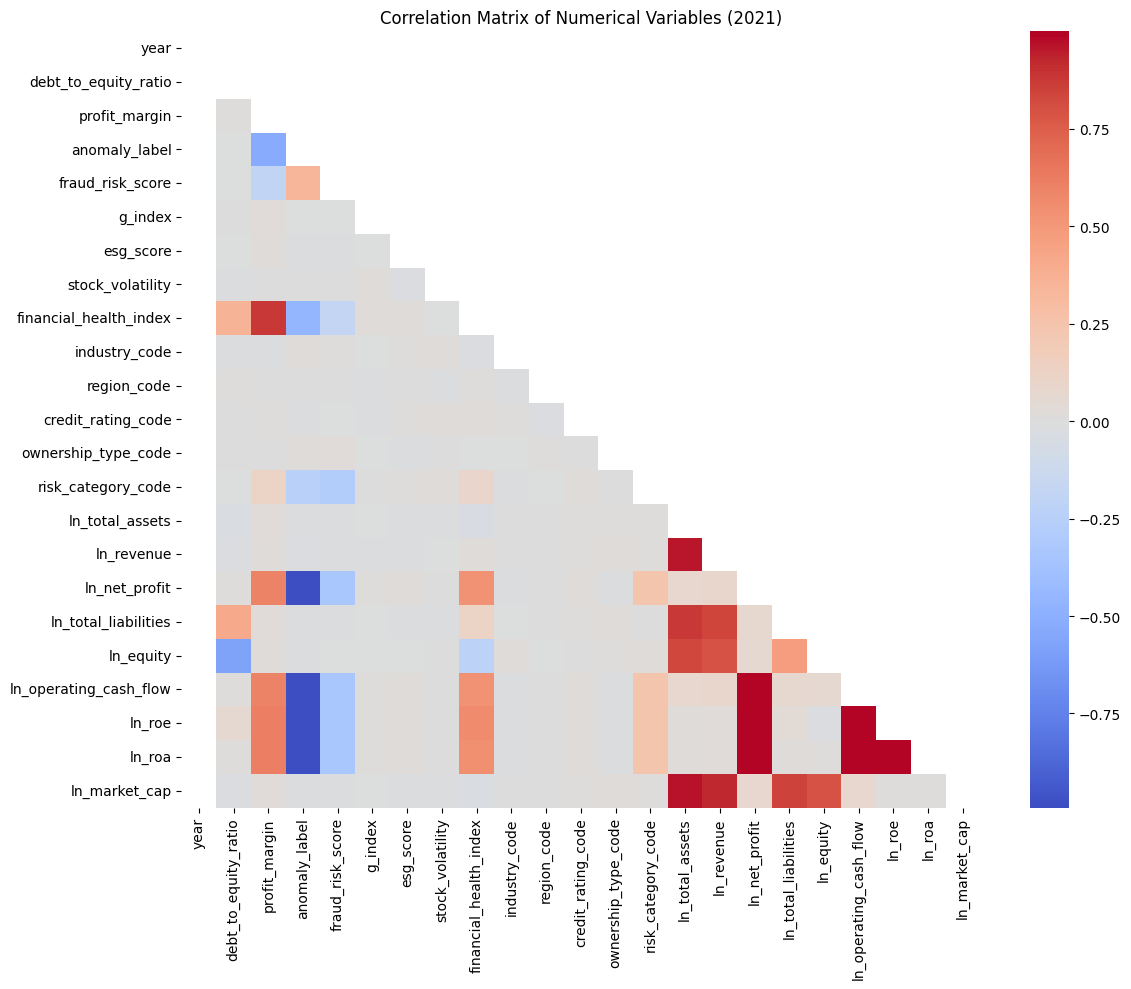


📊 ESG Correlation Analysis for Year 2022
Top factors correlated with ESG score:
debt_to_equity_ratio   :  0.0339
financial_health_index :  0.0301
profit_margin          :  0.0197
ln_equity              : -0.0169
ln_total_liabilities   :  0.0168
stock_volatility       :  0.0165
g_index                : -0.0139
fraud_risk_score       :  0.0135
ln_roe                 :  0.0098
ln_net_profit          :  0.0082


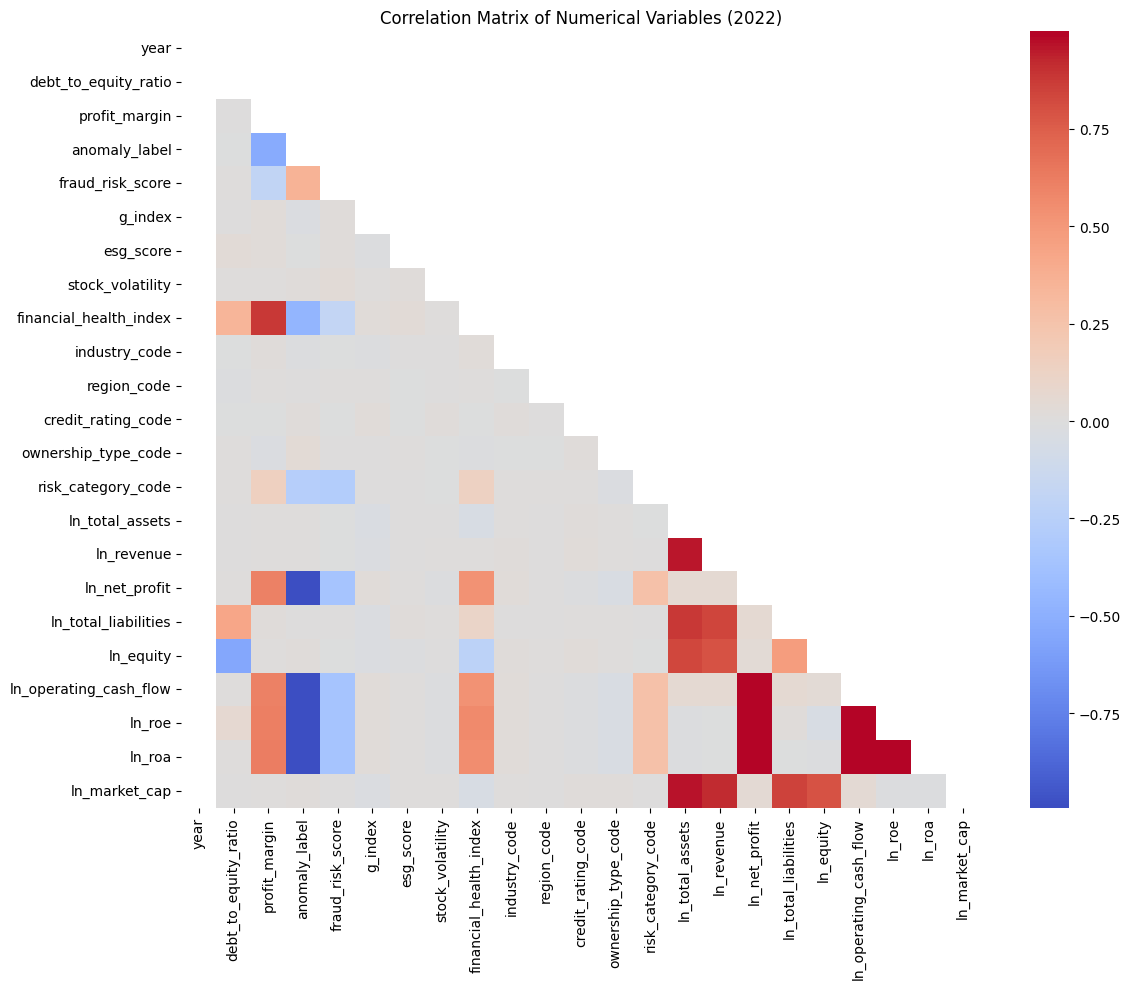


📊 ESG Correlation Analysis for Year 2023
Top factors correlated with ESG score:
region_code            :  0.0281
stock_volatility       :  0.0257
ln_equity              :  0.0156
ownership_type_code    : -0.0153
ln_operating_cash_flow :  0.0140
ln_total_assets        :  0.0140
ln_net_profit          :  0.0137
g_index                :  0.0124
ln_revenue             :  0.0120
ln_roa                 :  0.0117


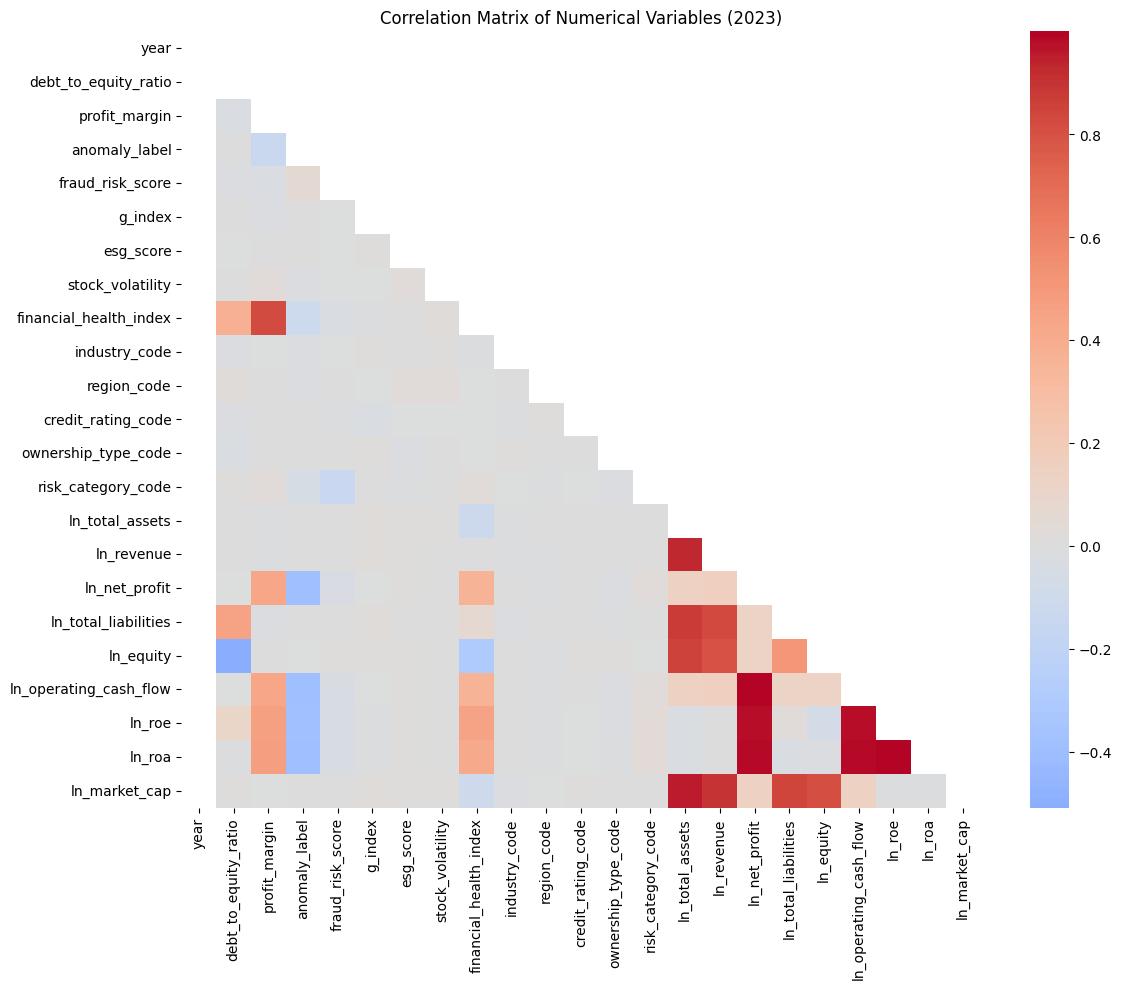


📊 ESG Correlation Analysis for Year 2024
Top factors correlated with ESG score:
anomaly_label          :  0.0300
ln_equity              :  0.0247
ln_market_cap          :  0.0190
debt_to_equity_ratio   : -0.0184
ln_total_assets        :  0.0183
region_code            : -0.0176
ln_net_profit          :  0.0172
ln_operating_cash_flow :  0.0167
stock_volatility       : -0.0148
ln_roa                 :  0.0146


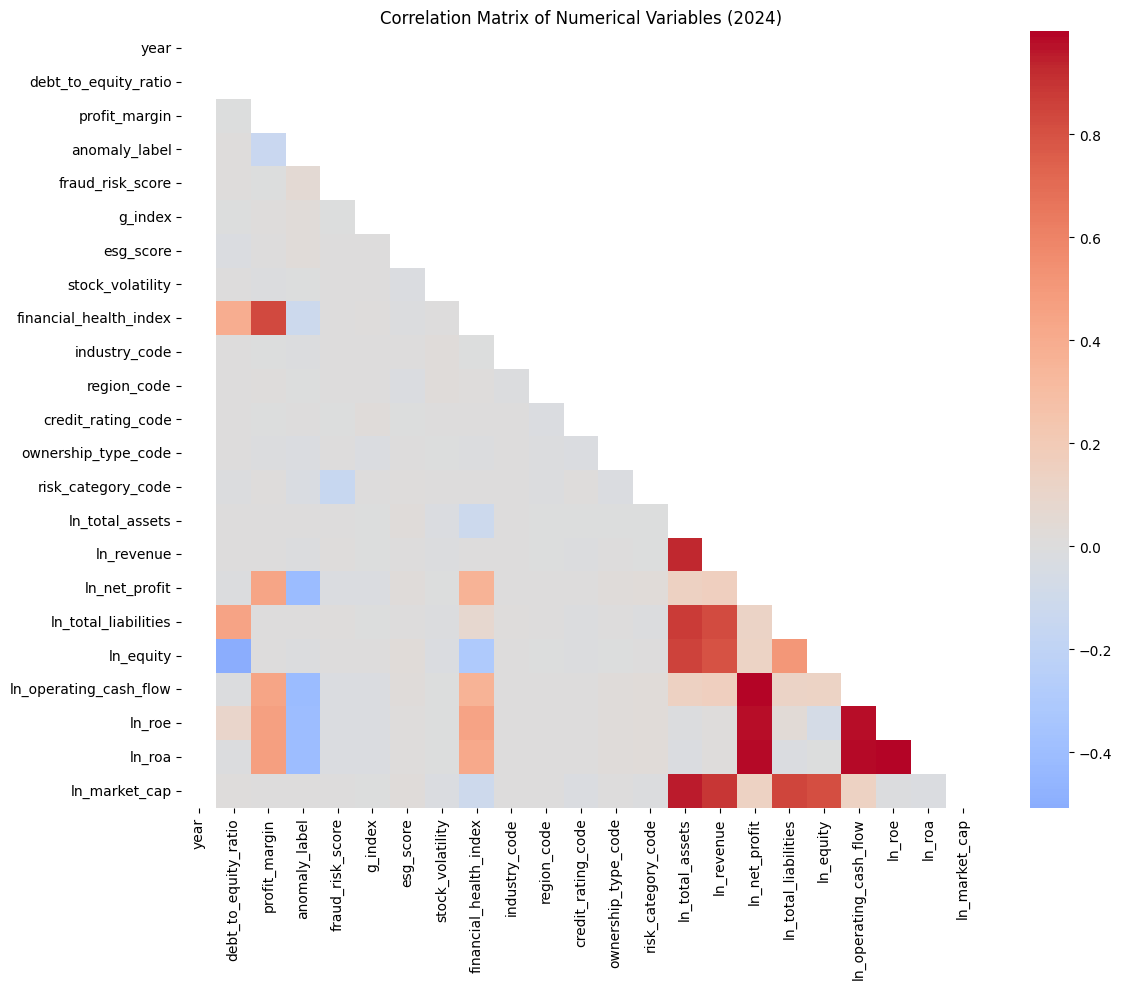


📊 ESG Correlation Analysis for Year 2025
Top factors correlated with ESG score:
ownership_type_code    : -0.0201
stock_volatility       :  0.0161
g_index                : -0.0150
industry_code          :  0.0139
credit_rating_code     :  0.0127
anomaly_label          :  0.0080
ln_roe                 :  0.0076
ln_roa                 :  0.0070
ln_net_profit          :  0.0068
ln_operating_cash_flow :  0.0068


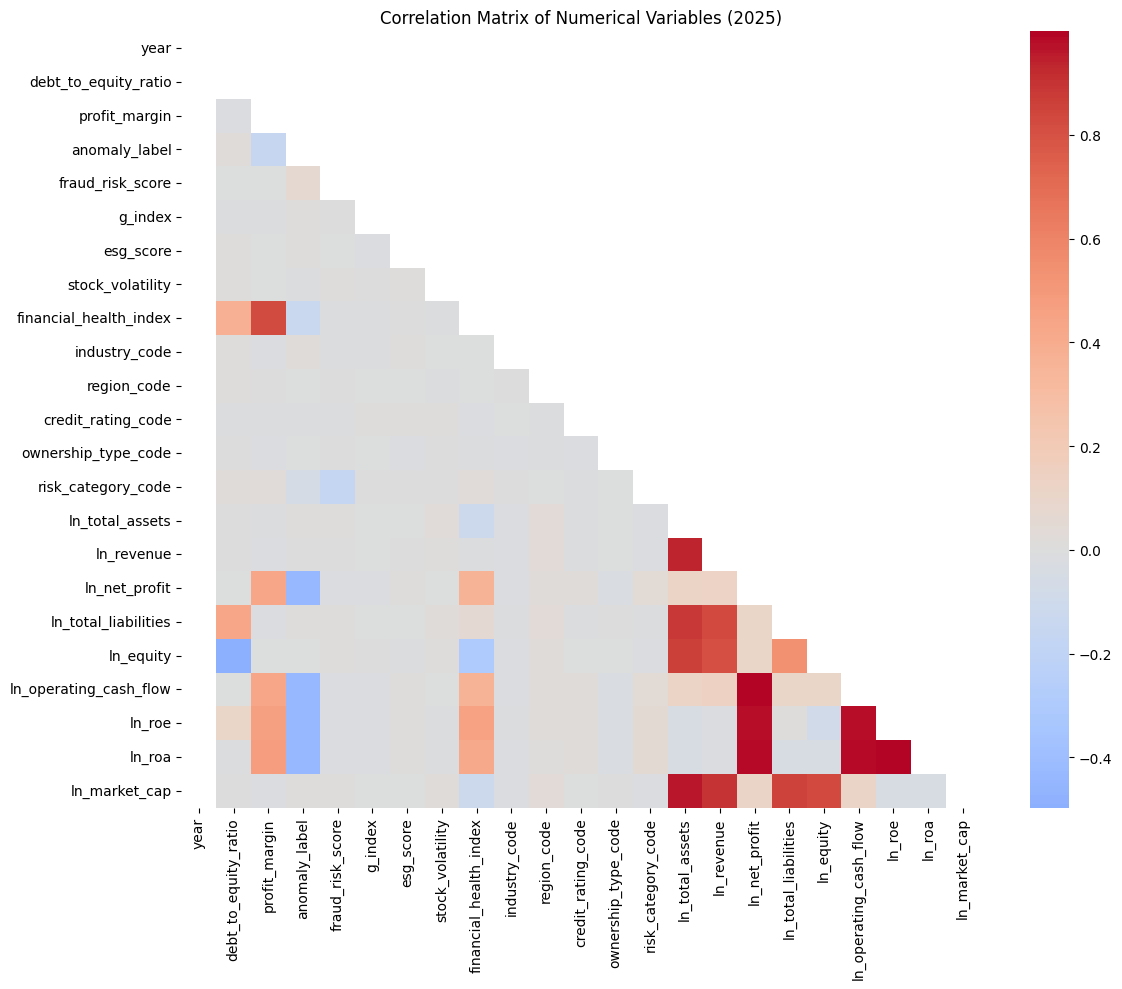

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

for yr in years:
    print("\n" + "="*60)
    print(f"📊 ESG Correlation Analysis for Year {yr}")
    print("="*60)
    
    df_year = df[df['year'] == yr]
    
    # Calculate correlations with ESG score
    correlations = df_year[numerical_cols].corr()['esg_score'].drop('esg_score').sort_values(key=abs, ascending=False)
    
 
    print("Top factors correlated with ESG score:")
    for factor, corr in correlations.head(10).items():
        print(f"{factor:23}: {corr:>7.4f}")
    
    # Visualization: Correlation heatmap
    plt.figure(figsize=(12, 10))
    corr_matrix = df_year[numerical_cols].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Upper triangle mask for aesthetics
    sns.heatmap(corr_matrix, cmap='coolwarm', center=0, mask=mask, annot=False)
    plt.title(f'Correlation Matrix of Numerical Variables ({yr})')
    plt.tight_layout()
    plt.show()


In [26]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


for yr in years:
    print("\n" + "="*60)
    print(f"📊 VIF Analysis for Year {yr}")
    print("="*60)
    
    df_year = df[df['year'] == yr]
    
    
    # Initialize lists
    variables_to_remove = []
    remaining_vars = numerical_cols.copy()  # Start with all numerical variables
    
    # Iteratively remove high VIF variables
    while True:
        # Define predictor variables
        X = df_year[remaining_vars]
        X = add_constant(X)
        
        # Calculate VIF
        vif = pd.DataFrame()
        vif['Feature'] = X.columns
        vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        
        vif_no_const = vif[vif['Feature'] != 'const']
        max_vif = vif_no_const['VIF'].max()
        
        if max_vif <= 10:
            print("No more variables with VIF > 10")
            break
        
        # Remove the variable with the highest VIF
        var_to_remove = vif_no_const.loc[vif_no_const['VIF'].idxmax(), 'Feature']
        variables_to_remove.append(var_to_remove)
        remaining_vars.remove(var_to_remove)
        print(f"Removing {var_to_remove} (VIF = {max_vif:.2f})")
        
        if len(remaining_vars) <= 1:
            break
    
    print(f"\nFinal variables for {yr}: {remaining_vars}")
    print(f"Removed variables for {yr}: {variables_to_remove}")



📊 VIF Analysis for Year 2021
Removing ln_roa (VIF = 7019.79)
Removing ln_net_profit (VIF = 5192.04)
Removing year (VIF = 4390.71)
Removing ln_total_assets (VIF = 3337.55)
Removing ln_operating_cash_flow (VIF = 876.25)
Removing ln_roe (VIF = 153.39)
Removing ln_equity (VIF = 34.00)
Removing ln_total_liabilities (VIF = 14.89)
Removing financial_health_index (VIF = 10.71)
No more variables with VIF > 10

Final variables for 2021: ['debt_to_equity_ratio', 'profit_margin', 'anomaly_label', 'fraud_risk_score', 'g_index', 'esg_score', 'stock_volatility', 'industry_code', 'region_code', 'credit_rating_code', 'ownership_type_code', 'risk_category_code', 'ln_revenue', 'ln_market_cap']
Removed variables for 2021: ['ln_roa', 'ln_net_profit', 'year', 'ln_total_assets', 'ln_operating_cash_flow', 'ln_roe', 'ln_equity', 'ln_total_liabilities', 'financial_health_index']

📊 VIF Analysis for Year 2022
Removing ln_roa (VIF = 7881.09)
Removing ln_net_profit (VIF = 6402.34)
Removing year (VIF = 4714.50)
Re


📊 ESG Correlation Analysis (VIF Cleaned) for Year 2021
Top factors correlated with ESG score (after VIF cleaning):
stock_volatility         : -0.0198
financial_health_index   :  0.0157
anomaly_label            : -0.0151
ln_operating_cash_flow   :  0.0146
profit_margin            :  0.0144
ln_revenue               : -0.0130
ln_market_cap            : -0.0122
fraud_risk_score         : -0.0122
ownership_type_code      : -0.0116
g_index                  : -0.0095


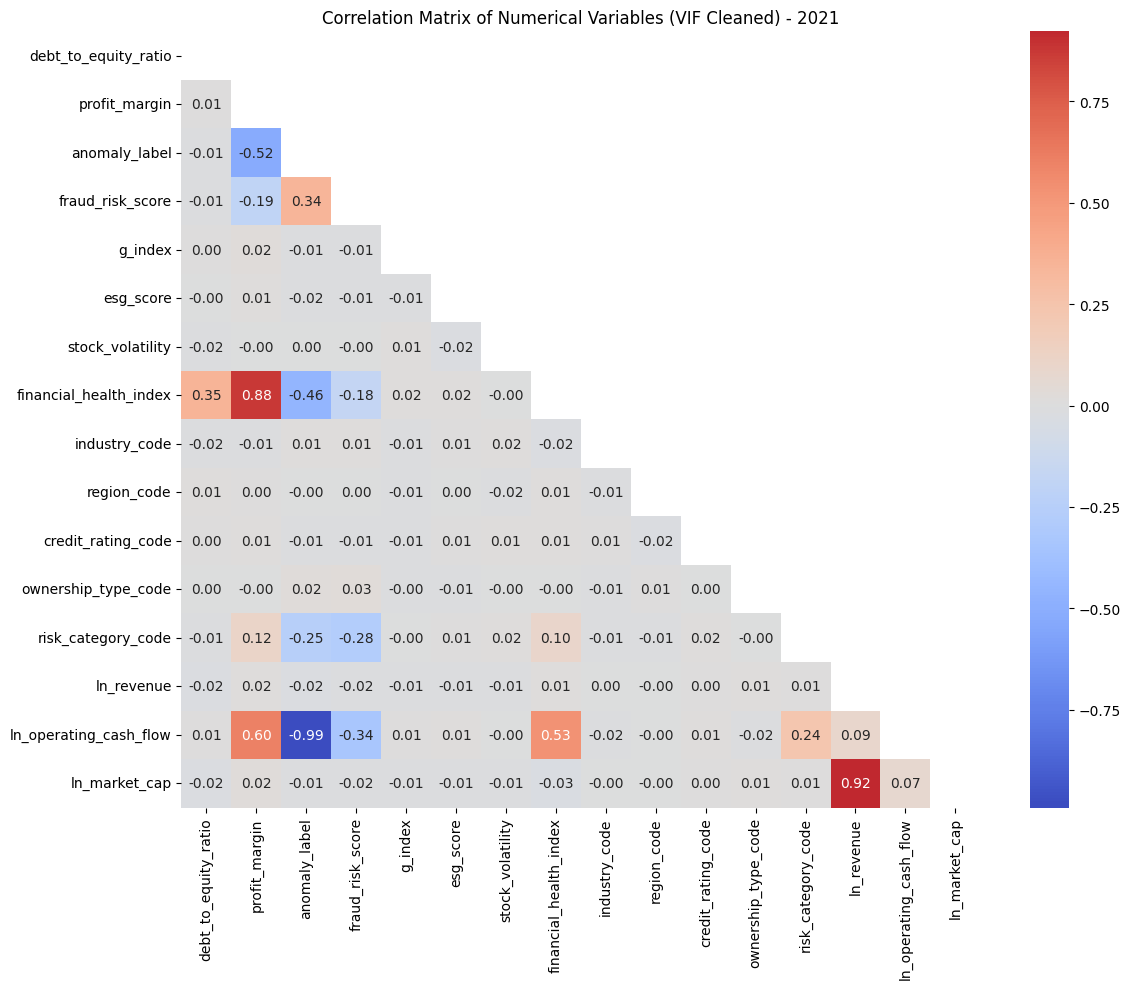


📊 ESG Correlation Analysis (VIF Cleaned) for Year 2022
Top factors correlated with ESG score (after VIF cleaning):
debt_to_equity_ratio     :  0.0339
financial_health_index   :  0.0301
profit_margin            :  0.0197
stock_volatility         :  0.0165
g_index                  : -0.0139
fraud_risk_score         :  0.0135
ln_operating_cash_flow   :  0.0081
anomaly_label            : -0.0071
ownership_type_code      :  0.0043
credit_rating_code       : -0.0042


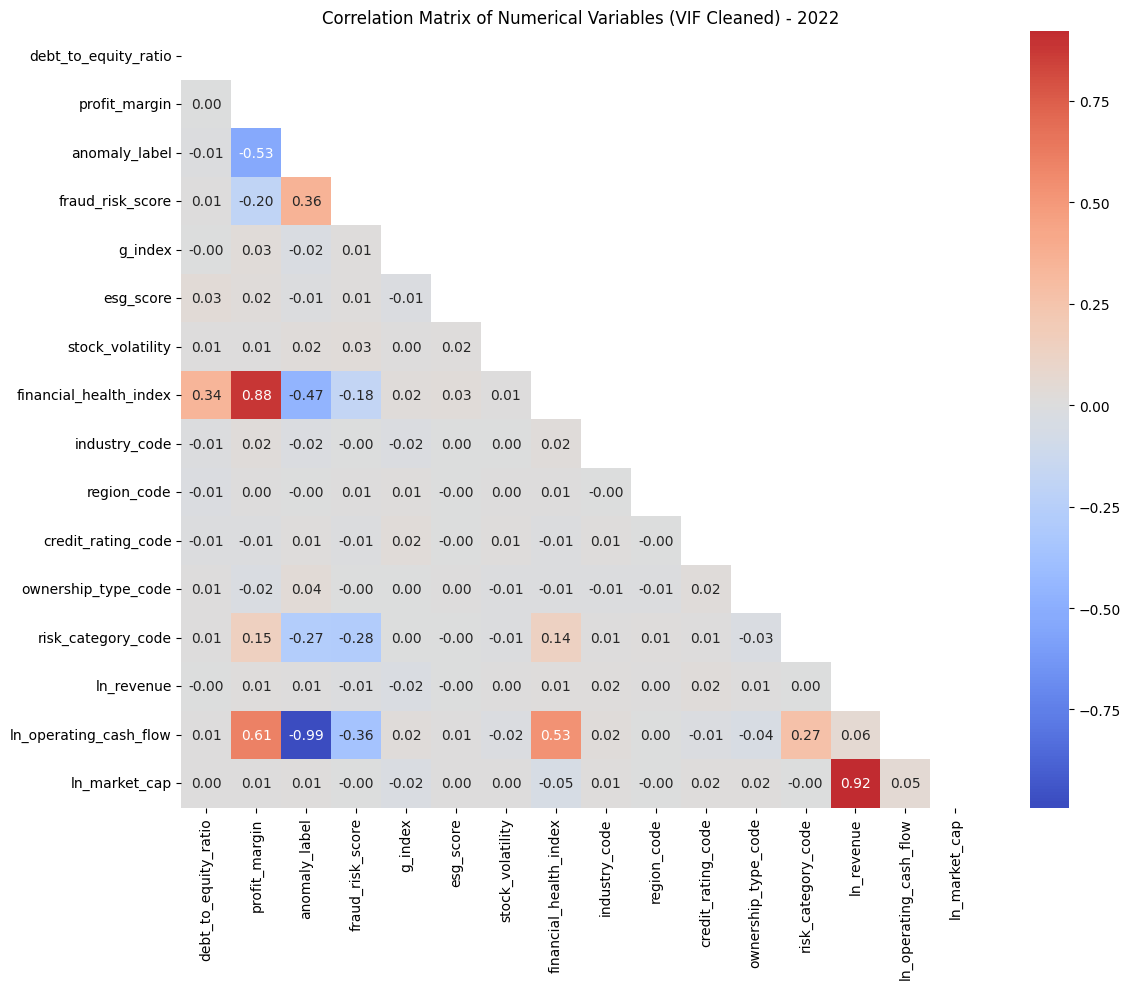


📊 ESG Correlation Analysis (VIF Cleaned) for Year 2023
Top factors correlated with ESG score (after VIF cleaning):
region_code              :  0.0281
stock_volatility         :  0.0257
ownership_type_code      : -0.0153
ln_operating_cash_flow   :  0.0140
g_index                  :  0.0124
ln_revenue               :  0.0120
ln_market_cap            :  0.0109
industry_code            :  0.0097
profit_margin            :  0.0090
risk_category_code       : -0.0085


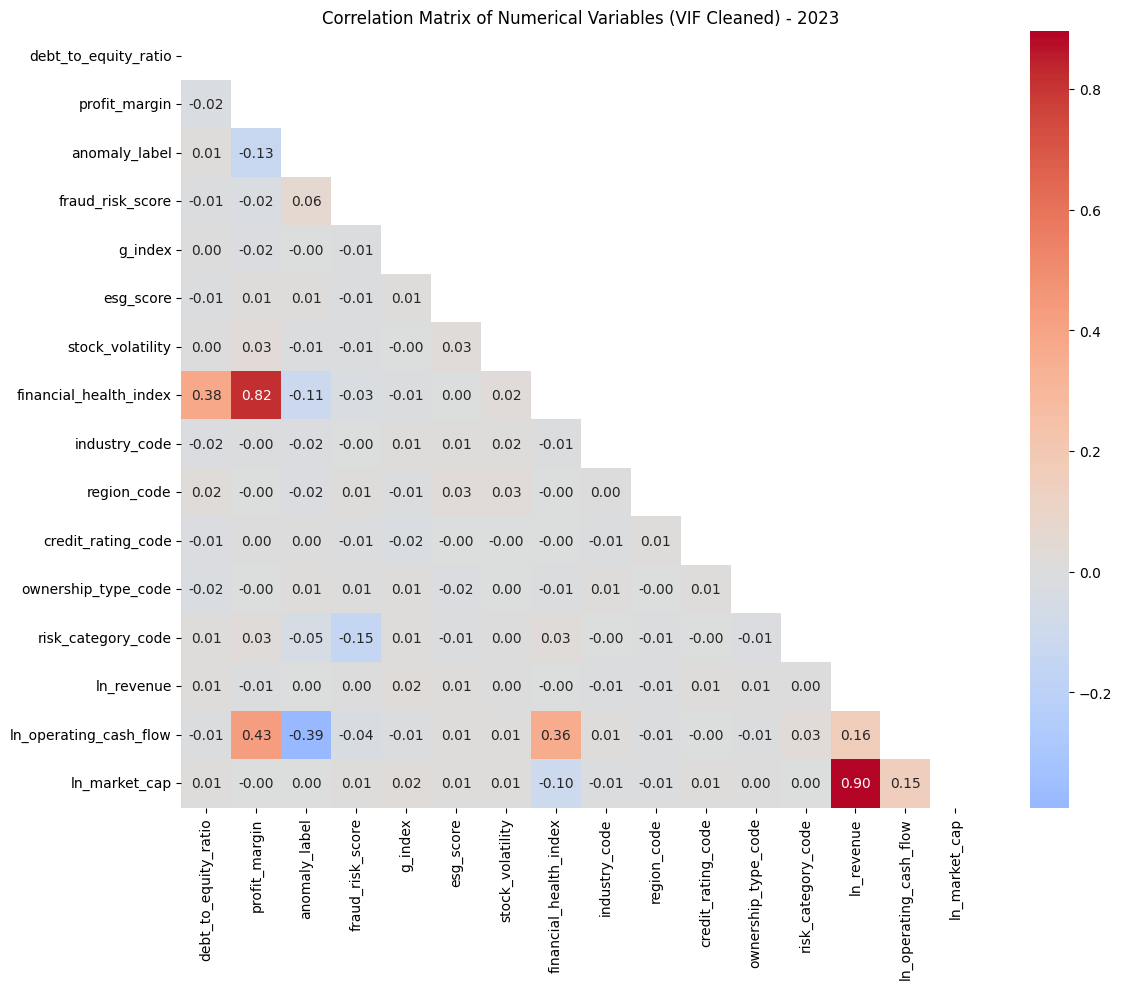


📊 ESG Correlation Analysis (VIF Cleaned) for Year 2024
Top factors correlated with ESG score (after VIF cleaning):
anomaly_label            :  0.0300
ln_market_cap            :  0.0190
debt_to_equity_ratio     : -0.0184
region_code              : -0.0176
ln_operating_cash_flow   :  0.0167
stock_volatility         : -0.0148
risk_category_code       :  0.0127
financial_health_index   : -0.0105
ln_revenue               :  0.0093
profit_margin            :  0.0081


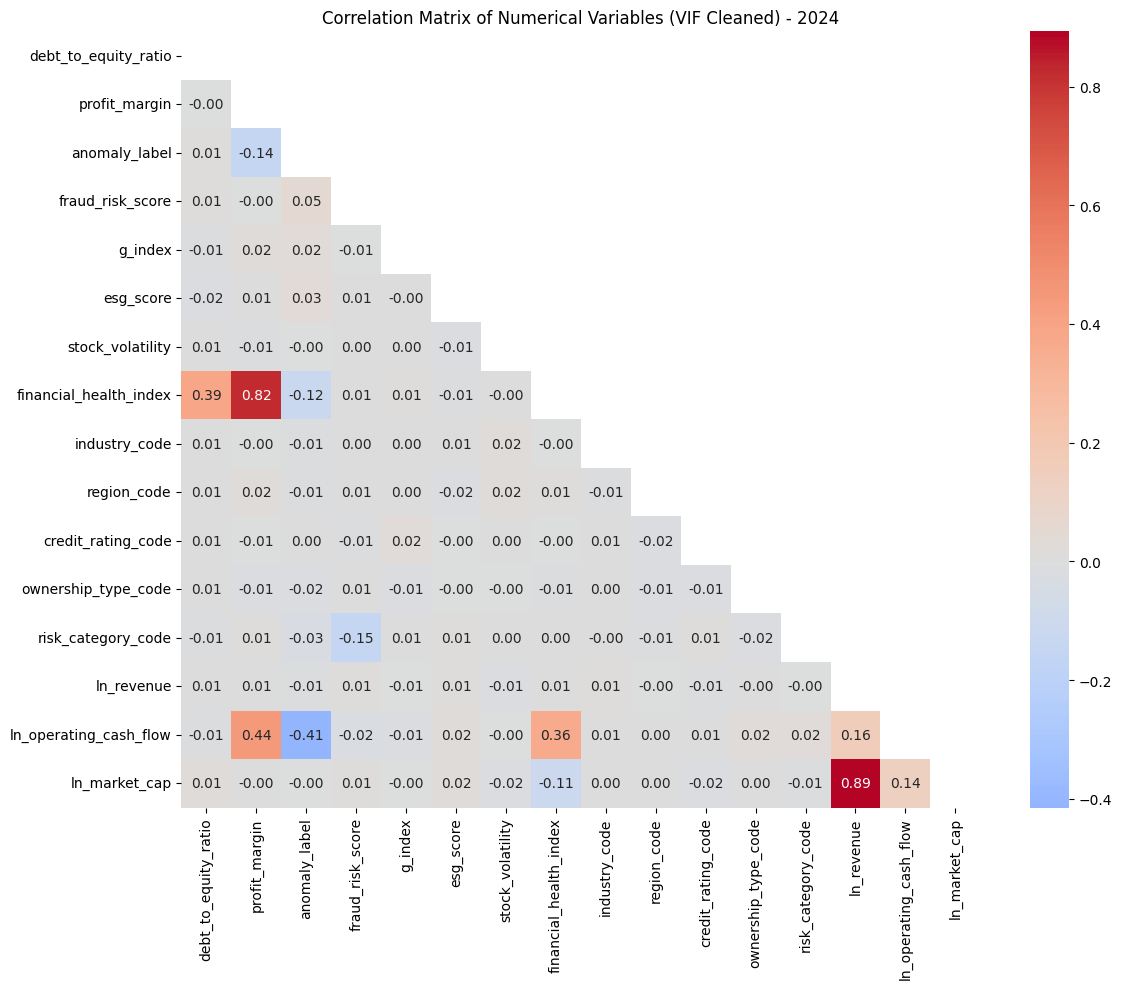


📊 ESG Correlation Analysis (VIF Cleaned) for Year 2025
Top factors correlated with ESG score (after VIF cleaning):
ownership_type_code      : -0.0201
stock_volatility         :  0.0161
g_index                  : -0.0150
industry_code            :  0.0139
credit_rating_code       :  0.0127
anomaly_label            :  0.0080
ln_operating_cash_flow   :  0.0068
debt_to_equity_ratio     :  0.0059
ln_market_cap            : -0.0051
profit_margin            : -0.0051


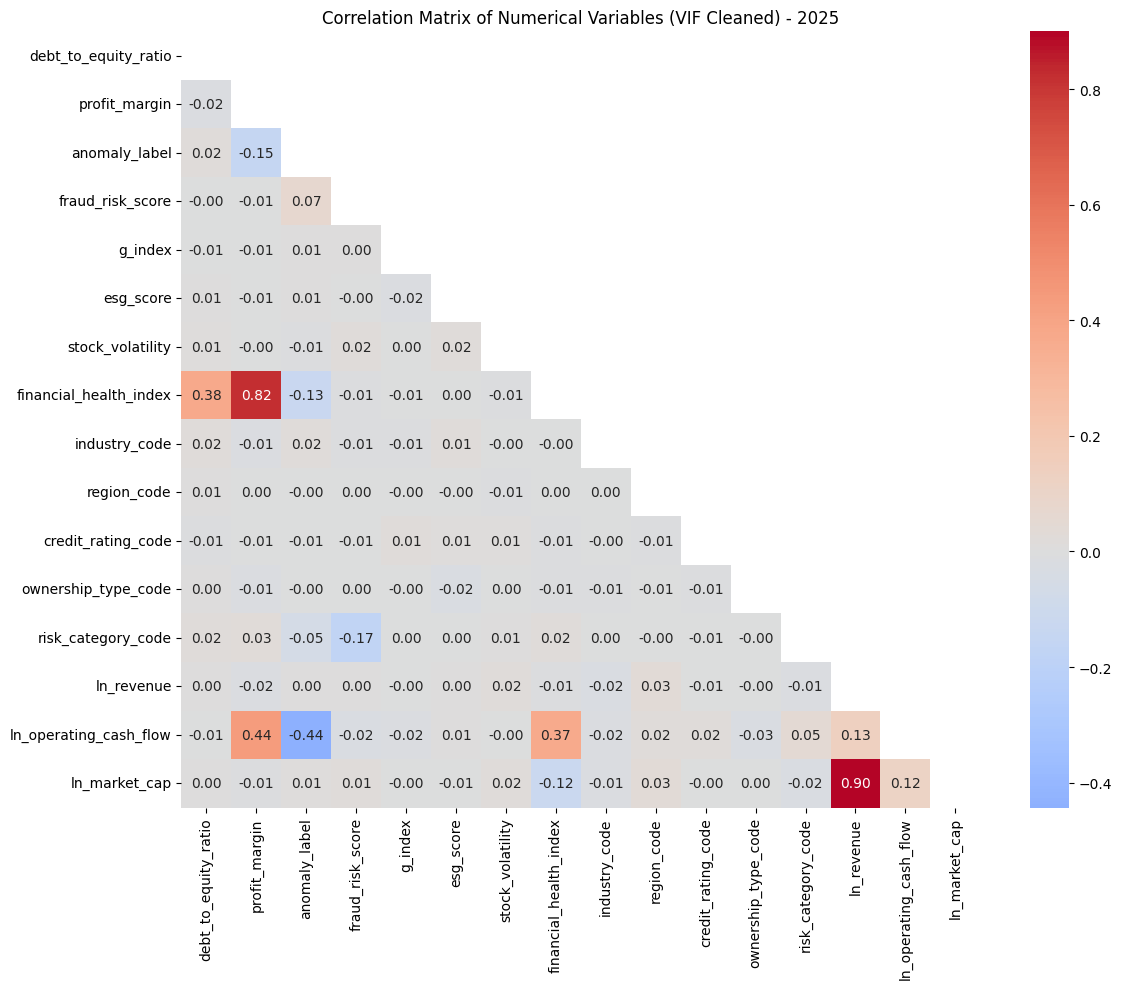

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


for yr in years:
    print("\n" + "="*60)
    print(f"📊 ESG Correlation Analysis (VIF Cleaned) for Year {yr}")
    print("="*60)
    
    df_year = df[df['year'] == yr]
    
    
    # use VIF cleaned variables
    cleaned_cols_year = [col for col in remaining_vars if col in df_year.columns]
    
    # calculate correlations with ESG score
    correlations = df_year[cleaned_cols_year].corr()['esg_score'].drop('esg_score')
    
    # safe sorting
    correlations_sorted = correlations.loc[correlations.abs().sort_values(ascending=False).index]
    
    # print top 10 correlated factors
    print("Top factors correlated with ESG score (after VIF cleaning):")
    for factor, corr in correlations_sorted.head(10).items():
        print(f"{factor:<25}: {corr:>7.4f}")
    
    # visualization: heatmap
    plt.figure(figsize=(12, 10))
    corr_matrix = df_year[cleaned_cols_year].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f', mask=mask)
    plt.title(f'Correlation Matrix of Numerical Variables (VIF Cleaned) - {yr}')
    plt.tight_layout()
    plt.show()
